# Метод головних компонент.

Метод головних компонент (англ. Principal Component Analysis - PCA) це метод для аналізу великих наборів даних, які містять багато вимірів/властивостей у одному спостережені. Він дозволяє збільшити здатність до інтерпритації даних, зберігаючи при цьому максимум інформації і роблячи можливою візуалізацію багатовимірних даних. Формально, PCA це статистична технологія, яка дозволяє зменшити вимірність датасету. Це досягяється через лінійні трансформації даних у нову систему координат, де (більшість) варінти даних можна описати з використанням меншої кількості вимірів, ніж початкові дані.

## Підключення бібліотек.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Дані.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Як видно з ключів, які є у словнику, датасет містить як дані про пухлини, так і різні додаткові поля. Наприклад, можна прочитати відомості про датасет, надрукувавши поле `DESCR`:

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Для формування датафрейму, з яким буде відбуватись робота, як дані використається поле `data` з словника cancer, а як назви колонок вектор `feature_names` з тогож словника:

In [4]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Візуалізація PCA.

Візуалізовувати багатовимірні дані є непросто. Тому, використавши PCA щоб знайти два основні компоненти, можна візуалізувати дані у новому, двовимірному просторі простим точковим графіком.
Перед тим, як це робити, потрібно масштабувати дані, щоб всі властивості мали однакову одиницю виміру. Це робиться з допомогою класу [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) з sklearn:

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [6]:
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) з sklearn має схожий процес до інших функцій препроцесингу які є у Scikit Learn. Спочатку створюється об'єкт PCA, потім шукаються основні компоненти викликом методу fit(), і на завершенні, щоб застосувати обертання та зменшення вимірності викликається метод transform(). При стоврені об'єкту PCA задавши параметр n_components можна вказати, скільки основних компонентів треба шукати.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca

PCA(n_components=2)

In [8]:
pca.fit(scaled_data)

PCA(n_components=2)

In [9]:
x_pca = pca.transform(scaled_data)
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [10]:
scaled_data.shape

(569, 30)

In [11]:
x_pca.shape

(569, 2)

Як видно, спочатку дані мали 30 вимірів, але PCA дозволило зменшити вимірність до 2. І тепер можна побудувати графіки цих даних:

Text(0, 0.5, 'Другий основний компонент')

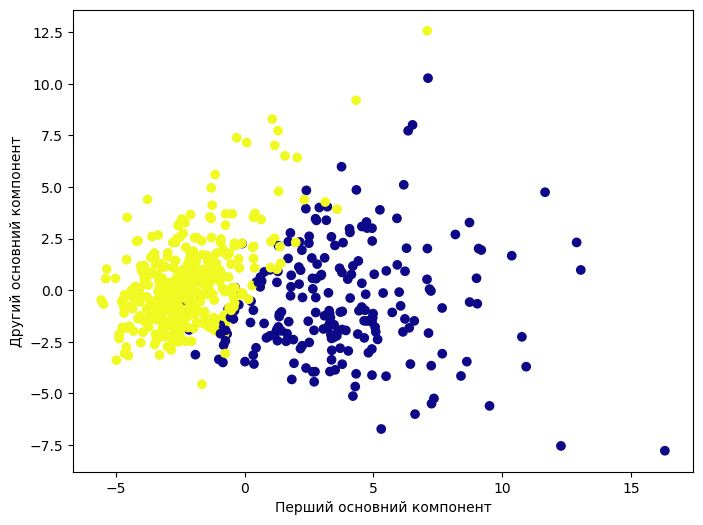

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0],x_pca[:, 1],c = cancer['target'], cmap = 'plasma')
plt.xlabel('Перший основний компонент')
plt.ylabel('Другий основний компонент')

## Інтерпретація компонентів.

Нажаль, при зменшенні вимірності втрачається можливість легко зрозуміти, що ці компоненти представляють.
Компоненти представляють комбінацію початкових властивостей. Доступитись до самих компонентів можна з допомогою атрибуту PCA об'єкту:

In [13]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

У цьому numpy масиві кожен рядочок є основним компоненто і кожна колонка має відношення до оригінальних значень. Ці відносини можна візуалізувати з допомогою мапи тепла:

<AxesSubplot:>

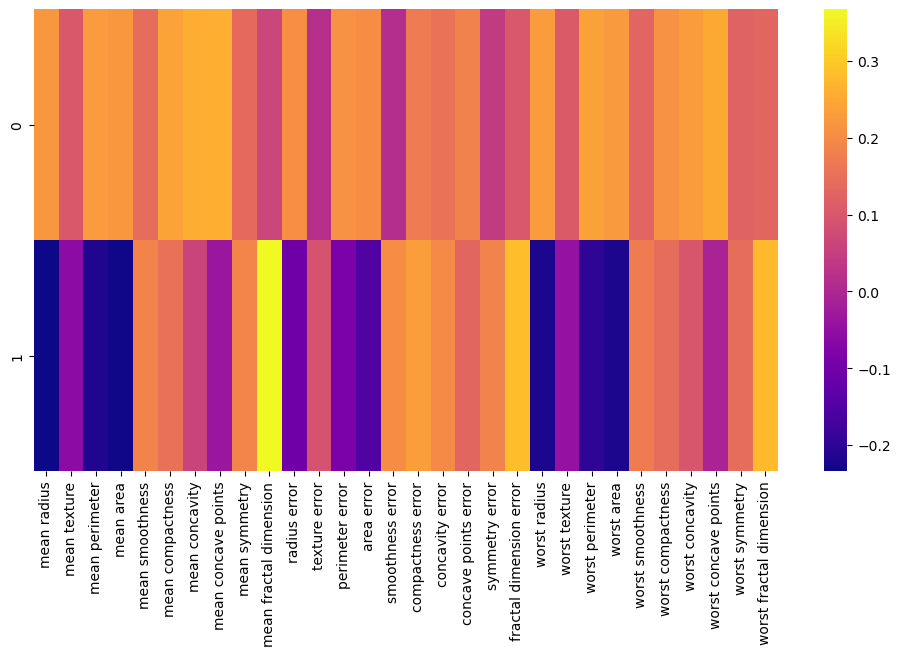

In [14]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
plt.figure(figsize=(12, 6))
sns.heatmap(df_comp, cmap = 'plasma')

Кольори у мапі тепла вказують на кореляцію між різними властивостями та основним компонентом.

# Cингулярний розклад матриці ознак.
Сингулярний розклад значень (англ. Singular Value Decomposition - SVD) - це потужна технологія, яка широко застосовується у вирішенні проблеми зменшення вимірності. Цей алгоритм працює з прямокутними матрицями. 
Ідея SVD в тому, що прямокутна матриця може бути розбита на добуток трьох інших матриць, з якими простіше працювати.
На відміну від PCA, цей метод не центрує точки даних перед тим, як обраховувати SVD. Це дозволяє цьому методу працювати з розрідженими матрицями ефективно.

Використання [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) є аналогічним до PCA. 

In [15]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)
svd

TruncatedSVD()

In [16]:
svd.fit(scaled_data)

TruncatedSVD()

In [17]:
x_svd = svd.transform(scaled_data)

Text(0, 0.5, 'Другий основний компонент')

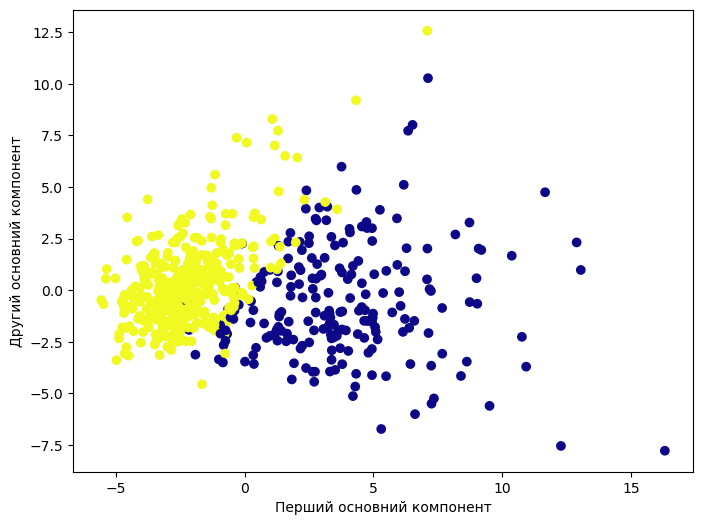

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(x_svd[:, 0],x_svd[:, 1], c = cancer['target'], cmap = 'plasma')
plt.xlabel('Перший основний компонент')
plt.ylabel('Другий основний компонент')